In [1]:
import numpy as np
import pandas as pd
import re
import string
import nltk
import collections
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud

from nltk.corpus import stopwords

In [2]:
boato_df = pd.read_json('data/boatos.json')

In [3]:
boato_df['text'] = [''.join(sent) for sent in boato_df['text']]

In [4]:
boato_df['len'] = boato_df['text'].apply(len)

In [5]:
n = len(boato_df)
print('before:  ', boato_df.shape)
for i, item in boato_df.iterrows():
    if not re.search('#boato', item['title']) or pd.isnull(item['date']) or item['len'] <= 50:
        boato_df.drop(i, inplace=True)
        
print('after:   ', boato_df.shape)
print('removed: ', n - len(boato_df))

before:   (1153, 4)
after:    (744, 4)
removed:  409


In [6]:
def remove_cheat(text):
    text = str(text)
    text = re.sub('#boato', '', text)
    return text

In [7]:
boato_df['title'] = boato_df['title'].apply(remove_cheat)

In [8]:
def date_to_str(dt):
    return dt.date().strftime("%Y-%m-%d")

In [9]:
boato_df['date'] = boato_df['date'].apply(date_to_str)

In [10]:
boato_df.head()

,date,text,title,len
0,2019-04-26,“Seria cômica se não fosse nojenta a cena que ...,\nMaria do Rosário perde dentadura durante vot...,363
1,2019-04-22,FINALMENTE. #ProfessoraHeleyPresente Em reuniã...,\nBolsonaro condecorou professora Heley de Abr...,933
2,2019-04-24,"A audiência tem que ser grande!!! Hoje, às 22h...","\nHoje, às 22h, a TV Record vai entrevistar Bo...",221
3,2019-04-25,"IBANEIS ROCHA, GOVERNADOR DO DISTRITO FEDERAL ...","\nIbaneis Rocha, governador do DF, viaja bêbad...",1382
4,2019-04-21,"PT MANDOU DINHEIRO PARA O NARCOTRÁFICO DO RIO,...",\nMarcelo Odebrecht diz que governo do PT deu ...,564


In [11]:
print('Quantidade média de caracteres: {}'.format(boato_df['len'].mean()))
print('Maior quantidade de caracteres: {}'.format(boato_df['len'].max()))
print('Menor quantidade de caracteres: {} (desconsiderando os que não tem mensagem)'.format(boato_df[boato_df['len'] != 0]['len'].min()))

Quantidade média de caracteres: 846.8077956989247
Maior quantidade de caracteres: 5315
Menor quantidade de caracteres: 64 (desconsiderando os que não tem mensagem)


In [12]:
boato_df['len'].max()

5315

In [13]:
sw = stopwords.words('portuguese')
def limpar_string(frase):
    frase = str(frase)
    frase = frase.lower()
    frase = re.sub(r'-', ' ', frase)
    frase = re.sub(r'<\w+>|\(\w+\)|[^\w\s]|\d|¹|²|³|º|ª', '', frase)
    frase = re.sub(r'\s+', ' ', frase)
    frase = frase.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in frase.split() if word not in sw and len(word) > 2])

In [14]:
limpar_string(boato_df['text'][0])

'cômica nojenta cena aconteceu última terça feira durante votação aprovação constitucionalidade texto reforma previdência ccj durante discurso dentadura deputada maria rosário caiu dois momentos guardá bolso cena viralizou internet causado gargalhadas internautas'

In [15]:
(boato_df['text'][0])

'“Seria cômica se não fosse nojenta a cena que aconteceu na última terça-feira durante votação para aprovação da constitucionalidade de texto da reforma da Previdência na CCJ. Durante o discurso, a dentadura da deputada Maria do Rosário (PT) caiu em dois momentos até ela guardá-la no bolso. A cena viralizou na internet e tem causado gargalhadas nos internautas”.'

In [16]:
boato_df['text'] = boato_df['text'].apply(limpar_string)

In [17]:
collections.Counter([wrd for lst in boato_df['text'] for wrd in lst.split()]).most_common()

[('bolsonaro', 504),
 ('lula', 420),
 ('brasil', 419),
 ('presidente', 385),
 ('ser', 281),
 ('vai', 274),
 ('todos', 218),
 ('governo', 195),
 ('contra', 193),
 ('país', 184),
 ('federal', 182),
 ('dilma', 176),
 ('agora', 174),
 ('dia', 171),
 ('anos', 163),
 ('pra', 161),
 ('globo', 160),
 ('milhões', 159),
 ('povo', 149),
 ('temer', 149),
 ('tudo', 145),
 ('sobre', 144),
 ('moro', 143),
 ('dinheiro', 141),
 ('hoje', 135),
 ('porque', 131),
 ('todo', 129),
 ('ainda', 126),
 ('pode', 120),
 ('vamos', 117),
 ('fazer', 114),
 ('pessoas', 112),
 ('ter', 106),
 ('deputado', 100),
 ('ministro', 99),
 ('paulo', 98),
 ('onde', 98),
 ('mundo', 97),
 ('segundo', 97),
 ('aqui', 94),
 ('diz', 93),
 ('sendo', 88),
 ('dias', 88),
 ('nacional', 86),
 ('gente', 86),
 ('vídeo', 85),
 ('haddad', 84),
 ('bem', 82),
 ('assim', 82),
 ('mil', 81),
 ('educação', 81),
 ('jair', 81),
 ('brasileiro', 79),
 ('polícia', 79),
 ('caso', 77),
 ('esquerda', 77),
 ('disse', 77),
 ('família', 77),
 ('candidato', 77)

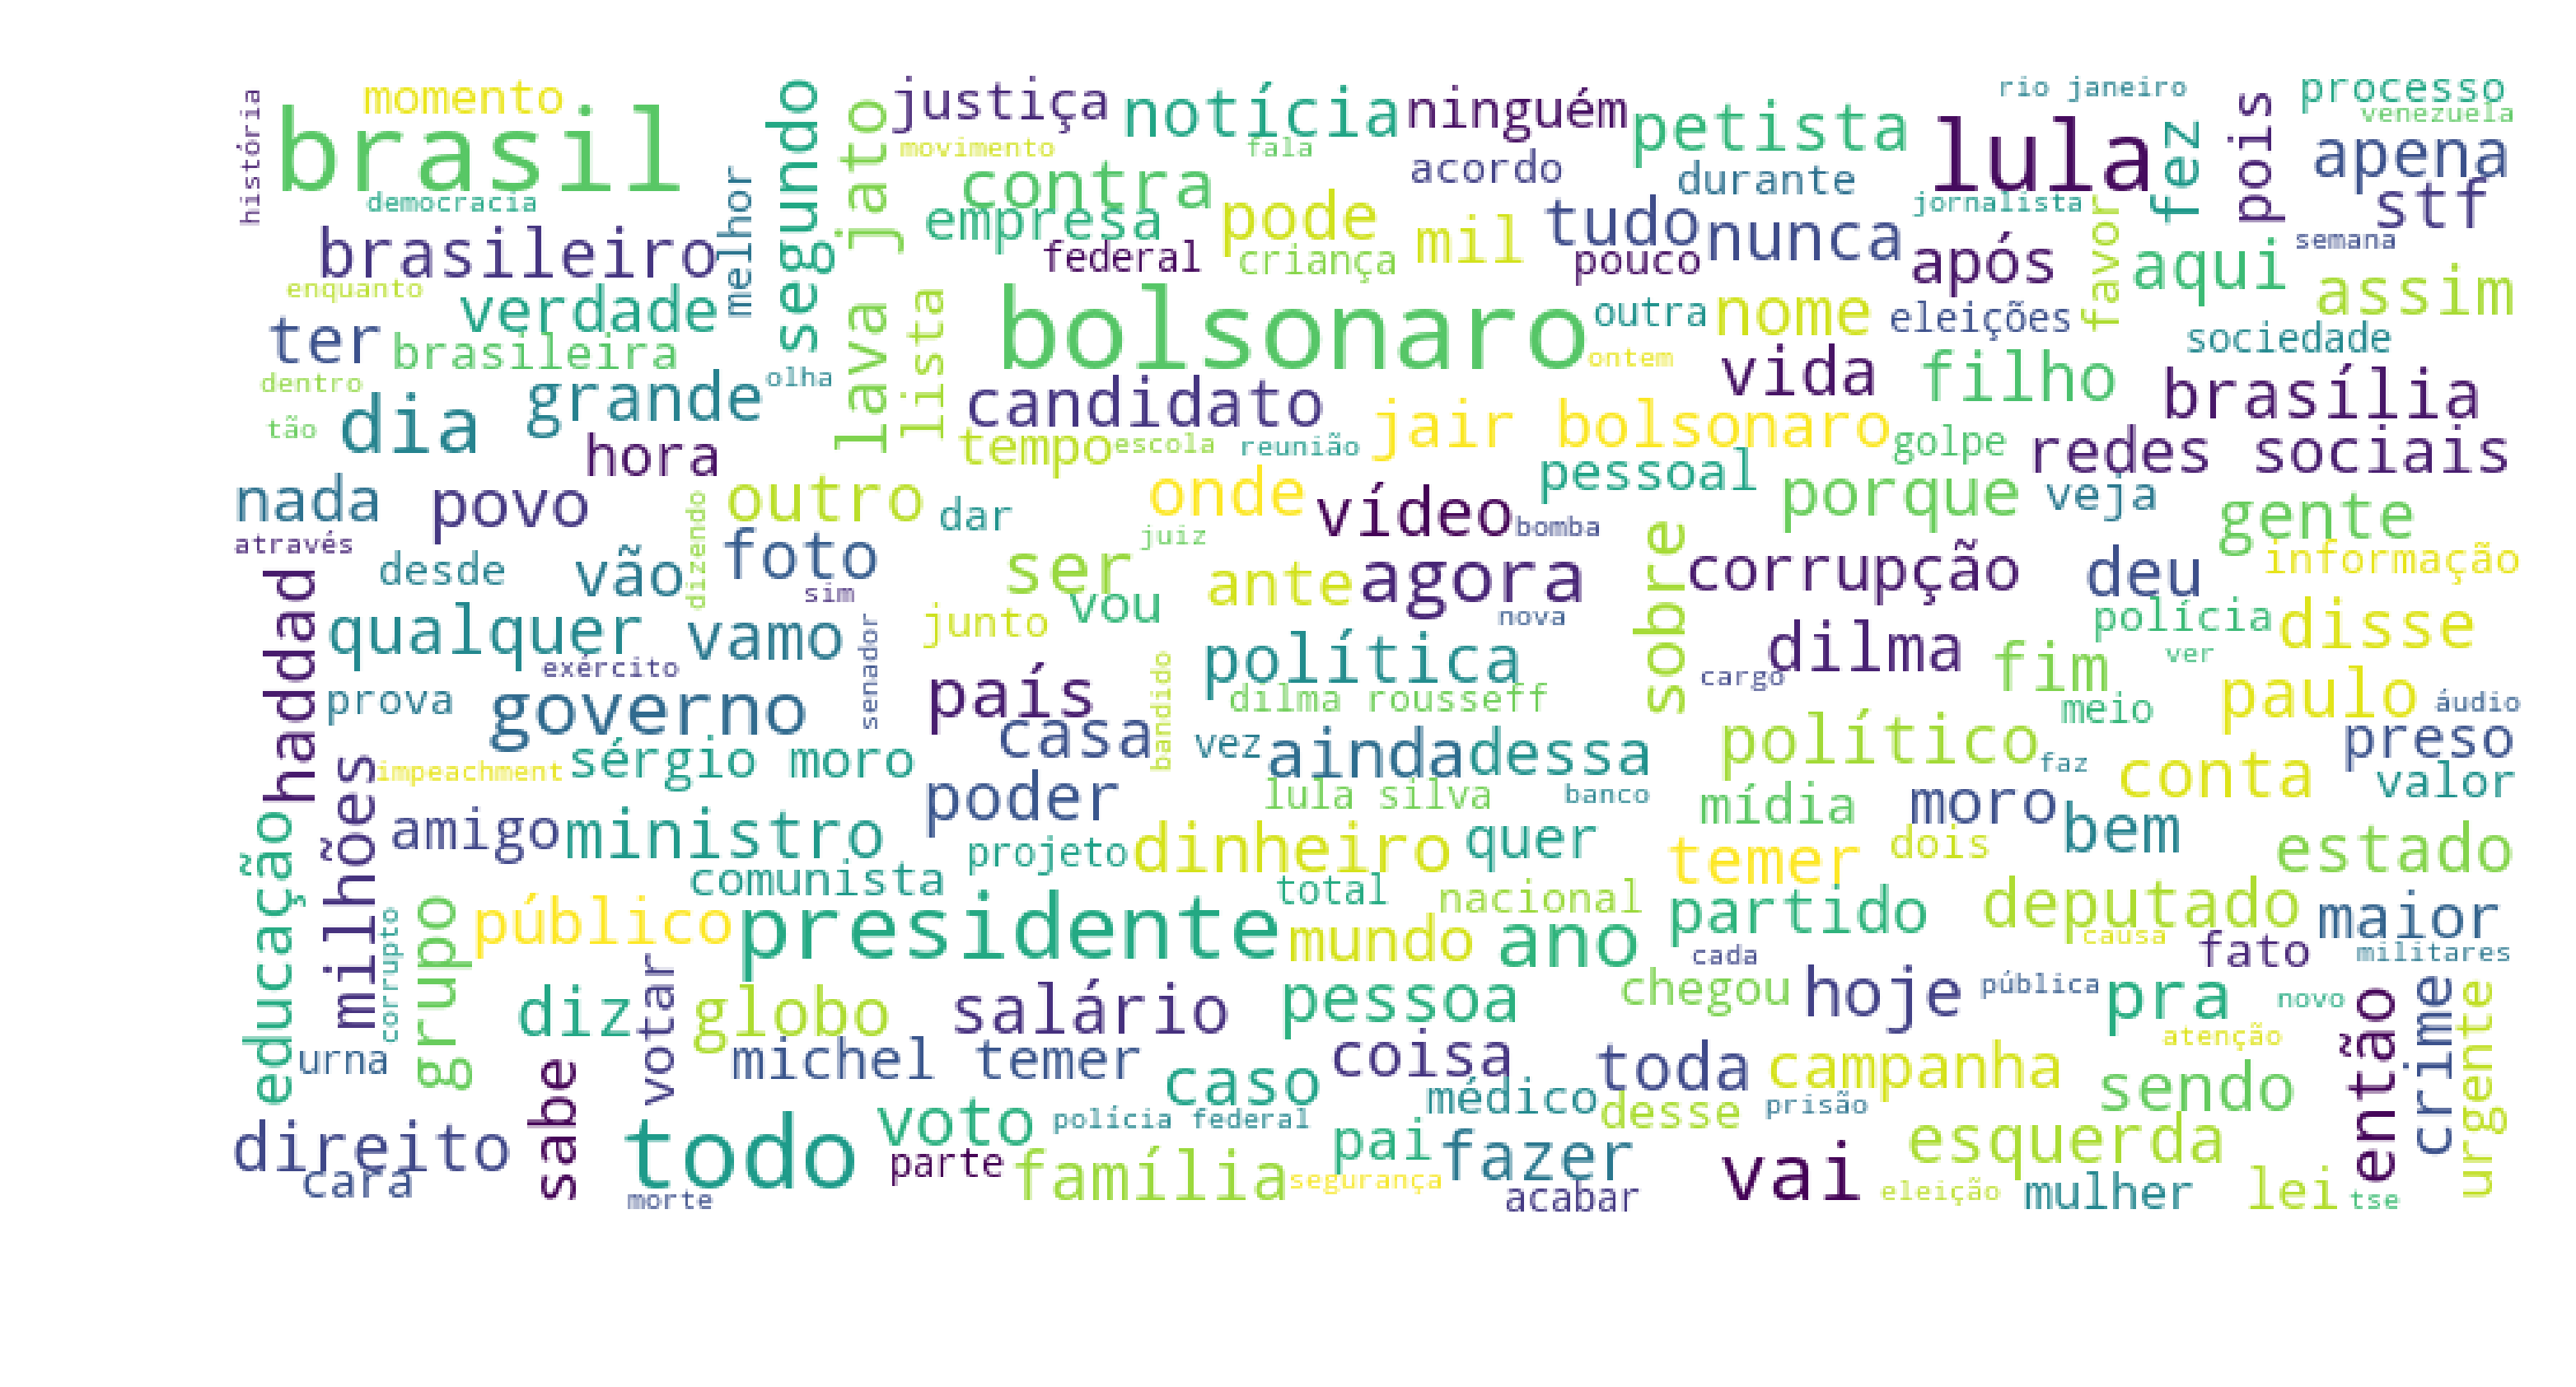

In [18]:
data = [wrd for lst in boato_df['text'][:] for wrd in lst.split()]
wordcloud = WordCloud(
                    background_color='white',
                    max_words=200,
                    max_font_size=40, 
                    random_state=42,
                    height=400,
                    width=800
                    ).generate(' '.join(data))

print(wordcloud)
fig = plt.figure(1, dpi=600)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("plots/word1.png", dpi=900)

In [19]:
dates = []
for item in boato_df['date']:
    dates.append(str(item)[:4])

collections.Counter(dates) 

Counter({'2019': 124,
         '2018': 328,
         '2017': 134,
         '2016': 151,
         '2015': 2,
         '2014': 4,
         '2013': 1})

In [20]:
boato_df['fake'] = 1

In [21]:
import pickle

pickle.dump(boato_df, open('data/boato_limpo.pkl', 'wb'))

In [37]:
for i, item in boato_df.iterrows():
    if re.search(r'vittar|\svitar\s', item['text']):
        print(item['text'], '\n\n')
    

fake direitas evangélicas bolsonaro queriaprocurando fotos pablo vitar grande gostosa twitter real kkkk bolsonaro queriaprocurando fotos pablo vitar grande gostosa 


